In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
import math

In [2]:
directory = "./data/"

In [3]:
# countries to exclude

to_keep = pd.read_excel(directory+"to_keep.xlsx")
cnt_keep = list(to_keep.Country)
len(cnt_keep)

115

In [5]:
df = pd.read_excel(directory+"AllData_Aggregate.xlsx")
df = df[df['Unnamed: 0'].isin(cnt_keep)]
df.set_index('Unnamed: 0', inplace=True)

In [6]:
df.head()

,Population,GDP,MYS,Meat_2017,Meat_2016,Meat_2015,Meat_2014,D_meat_2017,D_meat_2016,D_meat_2015,FB_jan_total,FB_jan_veg,FB_jan_sus,Veg_survey,Survey year,GT_veg,FB_penetration,FB_veg_fraction,FB_sus_fraction
Unnamed: 0,,,,,,,,,,,,,,,,,,,
Afghanistan,37172386.0,520.896603,3.30,8.59,9.05,9.98,10.62,-5.082873,-9.318637,-6.026365,3400000.0,40000.0,7700.0,NaN,NaN,0.000,0.091466,0.011765,0.002265
Albania,2866376.0,5268.848504,10.06,47.51,41.44,41.72,51.33,14.647683,-0.671141,-18.721995,1200000.0,87000.0,3800.0,NaN,NaN,0.000,0.418647,0.072500,0.003167
Algeria,42228429.0,4114.715061,9.17,18.06,19.25,19.36,20.13,-6.181818,-0.568182,-3.825137,20000000.0,370000.0,57000.0,NaN,NaN,0.000,0.473615,0.018500,0.002850
Angola,30809762.0,3432.385736,3.02,23.49,21.55,25.84,30.04,9.002320,-16.602167,-13.981358,2000000.0,30000.0,1000.0,NaN,NaN,0.000,0.064914,0.015000,0.000500
Argentina,44494502.0,11683.949622,9.79,109.38,108.18,108.95,103.47,1.109262,-0.706746,5.296221,29000000.0,3000000.0,67000.0,0.05,2017.0,0.375,0.651766,0.103448,0.002310


In [7]:
df_model = df[['GDP', 'MYS', 'Meat_2017', 'FB_veg_fraction']]
df_model.shape

(115, 4)

In [8]:
df_model = df_model.dropna()
df_model.shape

(113, 4)

# Multiple Linear Regression for Vegetarianism

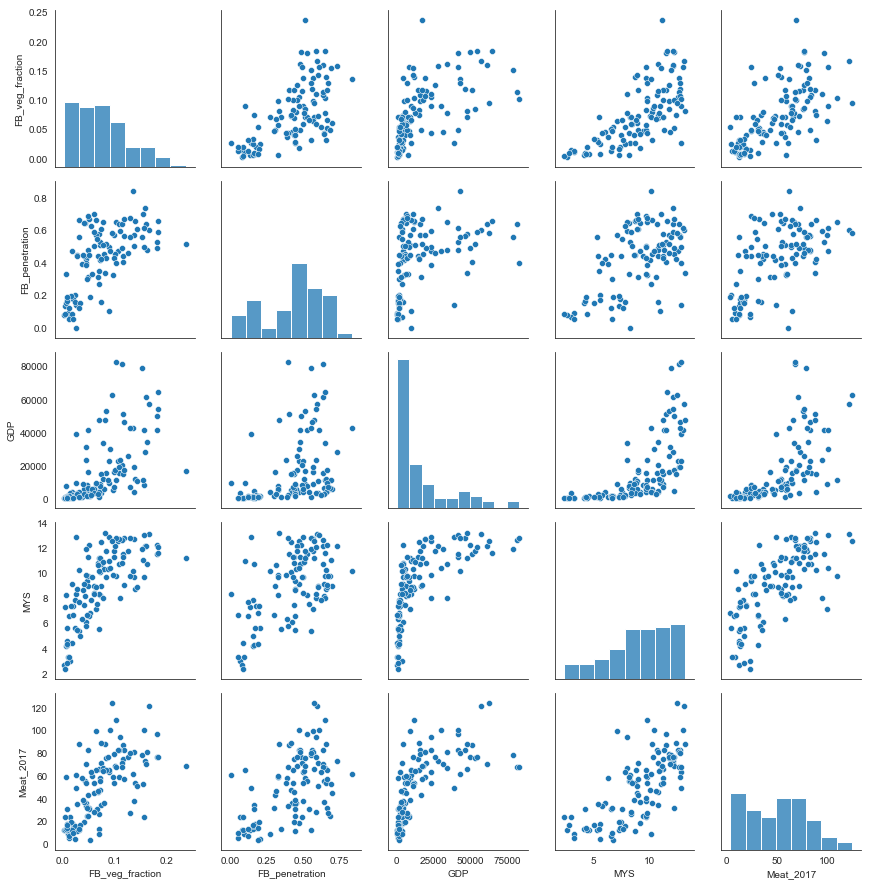

In [33]:
g = sns.pairplot(df[['FB_veg_fraction', 'FB_penetration', 'GDP', 'MYS', 'Meat_2017']])
plt.savefig(directory+"JointScatter.png", dpi=300, bbox_inches='tight')

In [34]:
df[['FB_veg_fraction', 'FB_penetration', 'GDP', 'MYS', 'Meat_2017']].shape

(115, 5)

In [12]:
#df_model = df_model / df_model.max(axis=0) #Normlaize all columns according to their max value, so that each variable is btw 0 and 1

y = df_model['FB_veg_fraction']
x = df_model[['Meat_2017', 'GDP', 'MYS']]

## With 3 factors

In [10]:
import statsmodels.api as sm

In [13]:
# no CONSTANT AND NORMALZIED
x = df_model[['Meat_2017', 'GDP', 'MYS',]]
x_noconst = x / x.max(axis=0)
y = y / y.max(axis=0)
x_const = sm.add_constant(x_noconst)

model_noconst = sm.OLS(y,x_noconst)
model_const = sm.OLS(y,x_const)
output_const = model_const.fit()
output_noconst = model_noconst.fit()


C:\Users\sibel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
# with constant
print(output_const.summary())

                            OLS Regression Results                            
Dep. Variable:        FB_veg_fraction   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     42.62
Date:                Fri, 26 Feb 2021   Prob (F-statistic):           2.64e-18
Time:                        11:55:19   Log-Likelihood:                 59.636
No. Observations:                 113   AIC:                            -111.3
Df Residuals:                     109   BIC:                            -100.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0956      0.053     -1.813      0.0

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

mse_const = mean_squared_error(y, output_const.fittedvalues)
mse_noconst = mean_squared_error(y, output_noconst.fittedvalues)

r2_const = r2_score(y, output_const.fittedvalues)
r2_noconst = r2_score(y, output_noconst.fittedvalues)

In [16]:
print(mse_const, mse_noconst)

0.020376271662290127 0.020990966226925353


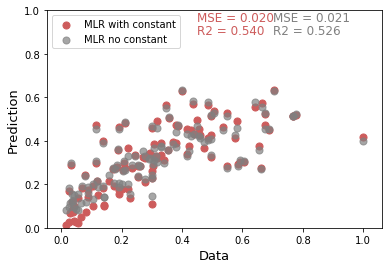

In [17]:
fig, ax = plt.subplots()

ax.scatter(x=y, y=output_const.fittedvalues, color='indianred', label='MLR with constant', alpha=1, s=50)
ax.scatter(x=y, y=output_noconst.fittedvalues, color='grey', label='MLR no constant', alpha=.7, s=50)
ax.set_ylabel("Prediction", fontsize=13)
ax.set_xlabel("Data", fontsize=13)
ax.set_ylim([0,1])

ax.annotate("MSE = {0:.3f}".format(mse_const), (.45, .95), fontsize=12, color='indianred')
ax.annotate("R2 = {0:.3f}".format(r2_const), (.45, .89), fontsize=12, color='indianred')

ax.annotate("MSE = {0:.3f}".format(mse_noconst), (.7, .95), fontsize=12, color='grey')
ax.annotate("R2 = {0:.3f}".format(r2_noconst), (.7, .89), fontsize=12, color='grey')

ax.legend(loc='upper left')
plt.savefig(directory+'mlr_const_noconst_revision.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
df_coeff = output_const.conf_int(alpha=0.05, cols=None)
df_coeff['coeff'] = output_const.params
df_coeff.columns = ['lower', 'upper', 'coeff']

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df_model[['Meat_2017', 'GDP', 'MYS']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.set_index('features', inplace=True)

vif.round(1)

,VIF Factor
features,
Meat_2017,9.5
GDP,2.9
MYS,7.8


In [26]:
results_as_html = output_const.summary().tables[1].as_html()
df_sm = pd.read_html(results_as_html, header=0, index_col=0)[0]

df_sm['VIF'] = round(vif['VIF Factor'], 3)
df_sm.loc['const', 'VIF'] = '-'

df_sm.to_excel(directory+"regression_3factor_summary_Feb21.xlsx")

In [27]:
df_sm

,coef,std err,t,P>|t|,[0.025,0.975],VIF
const,-0.0956,0.053,-1.813,0.073,-0.200,0.009,-
Meat_2017,0.2156,0.090,2.408,0.018,0.038,0.393,9.482
GDP,0.1298,0.083,1.570,0.119,-0.034,0.294,2.886
MYS,0.4328,0.099,4.359,0.000,0.236,0.630,7.82


In [28]:
con = {'Meat_2017':('Meat consumption per capita',0),
    'GDP':('GDP per capita',1),
      'MYS':('Mean years of schooling',2),
       'const':('Constant', 3)
      }


In [29]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(output_const, alpha=0.05)

In [30]:
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

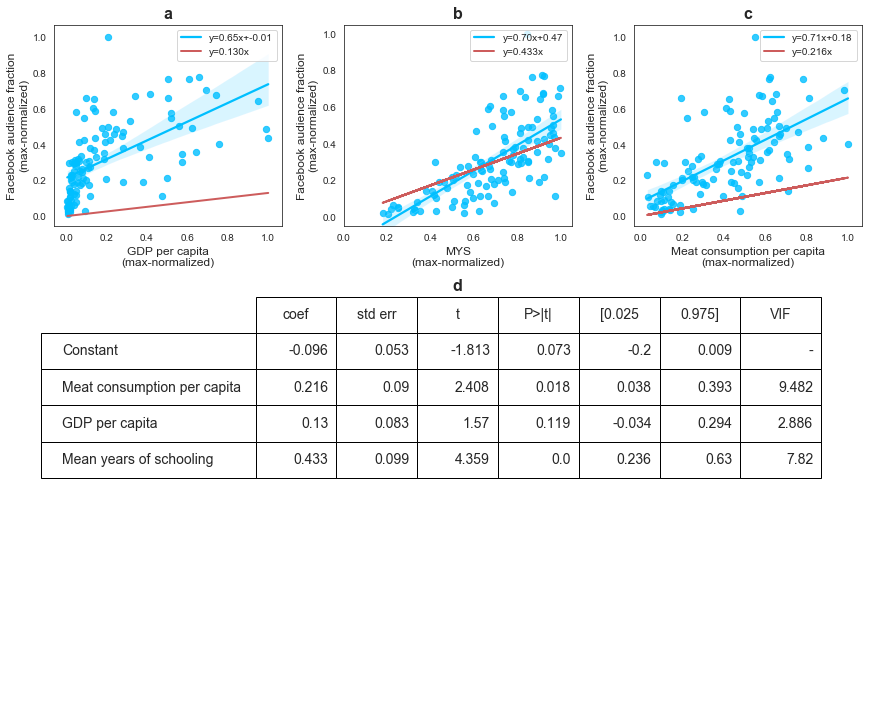

In [32]:
sns.set_style("white")
from matplotlib.ticker import FormatStrFormatter
from matplotlib.gridspec import GridSpec

fig = plt.figure(constrained_layout=True)

gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0:])

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
fig.set_figwidth(12)
fig.set_figheight(10)
#plt.subplots_adjust(wspace=0.25)

b_gdp = df_coeff.loc['GDP', 'coeff']

b_mys = df_coeff.loc['MYS', 'coeff']
b_meat = df_coeff.loc['Meat_2017', 'coeff']
b_0 = df_coeff.loc['const', 'coeff']

x = x_const

## === ax1 ===
x = x.sort_values('GDP')
y = y.reindex(x.index)
slope1, intercept1, r_value, p_value, std_err = stats.linregress(y,
                                                               x['GDP'])

#ax1.scatter(x=x['GDP'], y=y, color='deepskyblue', alpha=0.7, s=30)

#y11 = slope1 * x['GDP'] + intercept1
#ax1.plot(x['GDP'], y11, color='deepskyblue', lw=1.5)

ax1 = sns.regplot(x=x['GDP'], y=y, ax=ax1, color='deepskyblue',
                  line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope1,intercept1)},
                 scatter_kws={'s' : 40})

y21 = b_gdp * x['GDP']  #+ b_0 #+ b_mys * x['MYS'] +  b_meat * x['Meat_2017']
ax1.plot(x['GDP'], y21.to_list(), color='indianred', lw=2, label="y={0:.3f}x".format(b_gdp))

ax1.legend(loc='upper right')
ax1.set_ylabel("Facebook audience fraction\n(max-normalized)", fontsize=12)
ax1.set_xlabel("GDP per capita\n(max-normalized)", fontsize=12)
ax1.set_title("a", fontsize=16, fontweight='bold')
## === ax2 ===
slope2, intercept2, r_value, p_value, std_err = stats.linregress(y,
                                                               x['MYS'])
#print(intercept2, r_value)
#intercept2 = -0.1739
#ax2.scatter(x=x['MYS'], y=y, color='deepskyblue', alpha=0.7, s=30)
#y12 = slope2 * x['MYS'] + intercept2
#ax2.plot(x['MYS'], y12, color='deepskyblue', lw=1.5)

#y22 = df_coeff.loc['MYS', 'coeff'] * x['MYS'] + intercept2#df_coeff.loc['const', 'coeff']
ax2 = sns.regplot(x=x['MYS'], y=y, ax=ax2, color='deepskyblue',
                  line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope2,intercept2)},
                 scatter_kws={'s' : 40})

y22 = b_mys * x['MYS'] 
ax2.plot(x['MYS'], y22, color='indianred', lw=2, label="y={0:.3f}x".format(b_mys))

ax2.set_ylabel("Facebook audience fraction\n(max-normalized)", fontsize=12)
ax2.set_xlabel("MYS\n(max-normalized)", fontsize=12)
ax2.set_xlim([0,1.05])
ax2.set_title("b", fontsize=16, fontweight='bold')
ax2.legend(loc='upper right')
ax2.set_ylim([-0.05, 1.05])
## === ax3 ===
slope3, intercept3, r_value, p_value, std_err = stats.linregress(y,
                                                               x['Meat_2017'])
#ax3.scatter(x=x['Meat_2017'], y=y, color='deepskyblue', alpha=0.7, s=50)
#y13 = slope3 * x['Meat_2017'] + intercept3
#ax3.plot(x['Meat_2017'], y13, color='deepskyblue', lw=1.5)

ax3 = sns.regplot(x=x['Meat_2017'], y=y, ax=ax3, color='deepskyblue',
                  line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope3,intercept3)},
                 scatter_kws={'s' : 40})


#y23 = df_coeff.loc['Meat_2017', 'coeff'] * x['Meat_2017'] #df_coeff.loc['const', 'coeff']
y23 = b_meat * x['Meat_2017']
ax3.plot(x['Meat_2017'], y23, color='indianred', lw=2, label="y={0:.3f}x".format(b_meat))

ax3.set_ylabel("Facebook audience fraction\n(max-normalized)", fontsize=12)
ax3.set_xlabel("Meat consumption per capita\n(max-normalized)", fontsize=12)
ax3.set_title("c", fontsize=16, fontweight='bold')
ax3.legend(loc='upper right')
## === ax4 ===
ax4.set_title("d", fontsize=16, fontweight='bold')
ax4.grid(False)
for s in ax4.spines.values():
    s.set_visible(False) 
ax4.set_xticklabels([])
ax4.set_yticklabels([])

table=ax4.table(cellText=df_sm.round(3).values, 
                rowLabels=[con[i][0] for i in df_sm.index], 
                colLabels=df_sm.columns, 
                colWidths = [0.1]*df_sm.values.shape[1],
                loc='center', bbox = [0.25, .1, 0.7, 0.9])
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1,.8)
cellDict = table.get_celld()
#for key in cellDict.keys():
#    cellDict[key].set_height(2)

plt.savefig(directory+'revision1/multi_regression_Const_Feb21.png', dpi=600, bbox_inches='tight')
plt.savefig(directory+'revision1/multi_regression_300_Const_Feb21.png', dpi=300, bbox_inches='tight')
plt.show()